In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [9]:
stats.t.ppf((1 + 0.95) / 2, 1)

np.float64(12.706204736432095)

In [10]:
def get_summary(data):
    # calculations
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    sem = (std / np.sqrt(len(data)))
    ddof = np.array(len(data) - 1)
    t_star = stats.t.ppf((1 + 0.95) / 2, ddof)
    moe = (t_star * sem)
    lower = (mean - moe).clip(0, np.inf)
    upper = mean + moe
    
    # results
    result = {'data': data, 'mean': mean, 'std': std, 'sem': sem, 't_star': t_star, 'moe': moe, 'lower': lower, 'upper': upper, 'ddof': ddof}
    result = {key: value.round(2).item() if not isinstance(value, list) else value for key, value in result.items()}
    return result

def plot(summary, name):
    x = np.linspace(0, 400, 1000)
    y = stats.t.pdf(x, summary['ddof'], loc=summary['mean'], scale=summary['sem'])
    plt.fill_between(x, 0, y, color='red', alpha=0.5, where=(x >= summary['lower']) & (x <= summary['upper']), label='Margin of Error')
    plt.plot(x, y)
    plt.axvline(summary['mean'], color='red', linestyle='--', label='Mean')
    height = y.max() - y.min()
    plt.eventplot(summary['data'], orientation='horizontal', colors='black', linelengths=0.002, lineoffsets=0, label='Values')
    plt.legend()
    plt.title(f"Student's T distribution of values in {name}\nMean: {summary['mean']:.2f}, Sample STDEV: {summary['std']:.2f}, Margin of Error: {summary['moe']:.2f}")
    plt.xlim(x.min(), x.max())
    plt.ylim(-0.005, 0.065)
    return plt.gcf()

## Kolhapur

{'data': [185.0, 227.0], 'mean': 206.0, 'std': 29.7, 'sem': 21.0, 't_star': 12.71, 'moe': 266.83, 'lower': 0.0, 'upper': 472.83, 'ddof': 1}


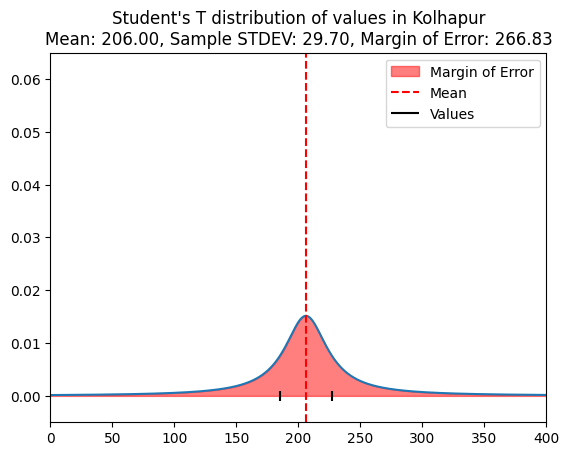

In [11]:
name = "Kolhapur"
readings = [185.0, 227.0]
summary = get_summary(readings)
print(summary)
fig = plot(summary, name)
fig.savefig(f'{name.lower()}.png', dpi=300)

## Jabalpur

{'data': [98.0, 133.0, 150.0, 193.0], 'mean': 143.5, 'std': 39.47, 'sem': 19.73, 't_star': 3.18, 'moe': 62.8, 'lower': 80.7, 'upper': 206.3, 'ddof': 3}


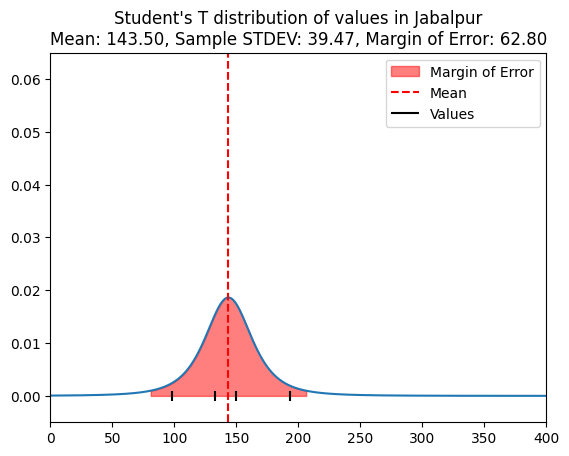

In [12]:
name = "Jabalpur"
data = [98.0, 133.0, 150.0, 193.0]
summary = get_summary(data)
print(summary)
fig = plot(summary, name)
fig.savefig(f'{name.lower()}.png', dpi=300)

## Hyderabad

{'data': [90, 78, 181, 79, 78, 76, 55, 82, 84, 58, 102], 'mean': 87.55, 'std': 33.63, 'sem': 10.14, 't_star': 2.23, 'moe': 22.6, 'lower': 64.95, 'upper': 110.14, 'ddof': 10}


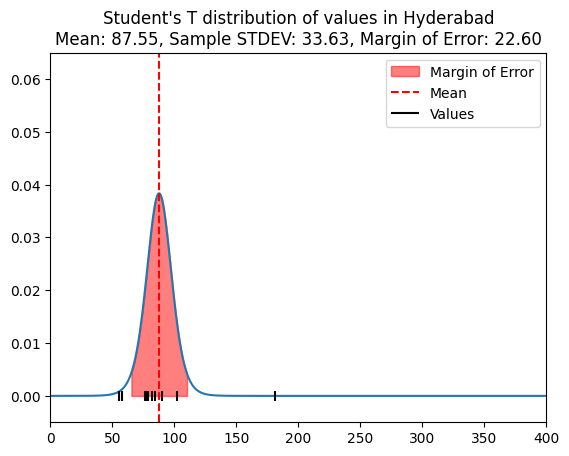

In [13]:
name = "Hyderabad"
data = [90, 78, 181, 79, 78, 76, 55, 82, 84,
58, 102]
summary = get_summary(data)
print(summary)
fig = plot(summary, name)
fig.savefig(f'{name.lower()}.png', dpi=300)

## Delhi

{'data': [182.0, 322.0, 252.0, 269.0, 245.0, 214.0, 230.0, 223.0, 229.0, 327.0, 219.0, 216.0, 272.0, 208.0, 320.0, 187.0, 230.0, 192.0, 332.0, 213.0, 198.0, 269.0, 226.0, 242.0, 299.0, 241.0, 249.0, 203.0, 270.0, 273.0, 228.0, 294.0, 233.0, 220.0, 208.0, 245.0, 271.0], 'mean': 244.62, 'std': 40.2, 'sem': 6.61, 't_star': 2.03, 'moe': 13.4, 'lower': 231.22, 'upper': 258.03, 'ddof': 36}


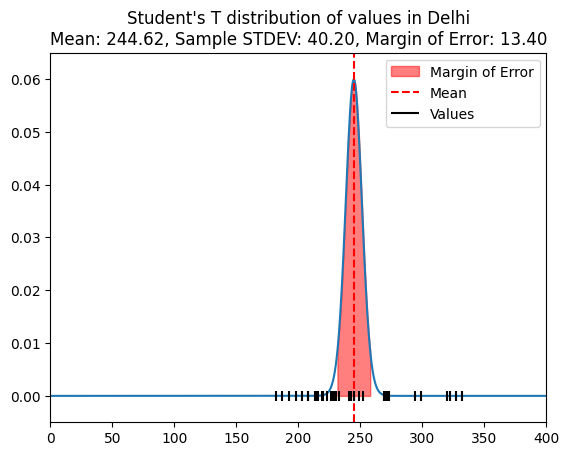

In [14]:
name = "Delhi"
data = list(map(float, [182, 322, 252, 269, 245, 214,
230, 223, 229, 327, 219, 216, 272, 208, 320,
187, 230, 192, 332, 213, 198, 269, 226, 242,
299, 241, 249, 203, 270, 273, 228, 294,
233, 220, 208, 245, 271]))
summary = get_summary(data)
print(summary)
fig = plot(summary, name)
fig.savefig(f'{name.lower()}.png', dpi=300)

## 